In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Game import *

Version:  0.2.35


In [3]:
state=Board(5,7)
for i in range(35):
    if rand()<0.5:
        state[i]=1
        
state

 1  0  1  1  0  1  1 
 1  1  0  1  0  0  0 
 1  0  1  0  1  0  0 
 1  1  0  1  1  0  0 
 0  0  1  1  0  0  1 

In [4]:
from RobotSim373 import *

Version:  0.0.44


In [13]:
def build(robot,x=1,y=2,name=None):
    R=1
    disk_center=Disk(robot,x,y,radius=R,name=f'center')
    
    
def monitor(t,robot):
    pass

In [38]:
def nothing(t,robot):
    return True

def take_picture(t,robot):
    import os
    
    count=0
    filename=f'images/misc_robot {count}.jpeg'
    
    while os.path.exists(filename):
        count+=1
        filename=f'images/misc_robot {count}.jpeg'
    
    
    robot.take_picture(filename)
    return True    

In [39]:
state_machine=StateMachine(
    (take_picture,"_end_simulation"),
)


In [55]:
def random_game_state():
    state=Board(5,7)
    for i in range(35):
        if rand()<0.5:
            state[i]=1
    return state

In [56]:
def random_TTT_game_state():
    Q=LoadTable('../Sprint #2 - Learning and Simulation/2021-10-18 TTT Q1.json')    
    keys=list(Q.keys())
    state=Board(3,3)
    state.board=random.choice(keys)
    return state

In [58]:
random_TTT_game_state()

 1  2  2 
 2  1  0 
 1  1  2 

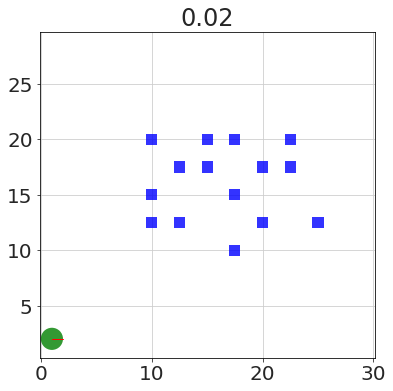

 1  0  1  1  0  1  0 
 0  1  1  0  1  1  0 
 1  0  0  1  0  0  0 
 1  1  0  0  1  0  1 
 0  0  0  1  0  0  0 



In [43]:
env=FrictionEnvironment(30,30)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

state=random_game_state()
for row in range(5):
    for col in range(7):
        x=col*2.5+10
        y=30-row*2.5-10
        print(x,y)
        if state[row,col]:
            Box(env,x=x,y=y,width=1,height=1)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=.1,  # make this larger for a faster display
       )

print(state)